# 고객 분류 (Kmeans) - Part1

Unsupervised Learning (비지도학습)
- 입력 데이터는 있지만 해당 데이터에 대한 정답이 없는 상태에서 모델을 학습시키는 방법
- Clustering, Dimensionality Reduction
- 애초에 정해진 답안이 없기 때문에 이 모델이 잘 되었는지, 안되었는지에 평가하기 어려움

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [3]:
# 데이터 만들기 (sample)
from sklearn.datasets import make_blobs

# 관측치 10개, 독립변수 2개, 4개의 그룹
df = make_blobs(n_samples=10, n_features=2, centers=4, random_state=100)
df

(array([[-10.3437585 ,  -8.68693583],
        [  3.16310256,   5.67461936],
        [  3.59950039,   7.4541373 ],
        [ -8.28664122,  -6.02701241],
        [ -2.09324324,   7.71236972],
        [  1.08927851,  -5.50265563],
        [  0.41007185,  -3.99744881],
        [ -0.83692738,   6.7911115 ],
        [ -2.04092856,   7.92525533],
        [  0.678603  ,  -4.17761085]]),
 array([2, 3, 3, 2, 1, 0, 0, 1, 1, 0]))

In [4]:
# Indexing (sample)
df[0][:, 0]

array([-10.3437585 ,   3.16310256,   3.59950039,  -8.28664122,
        -2.09324324,   1.08927851,   0.41007185,  -0.83692738,
        -2.04092856,   0.678603  ])

In [5]:
# 본격적인 데이터 만들기
from sklearn.datasets import make_blobs

# 관측치 200개, 독립변수 2개, 4개의 그룹
df = make_blobs(n_samples=200, n_features=2, centers=4, random_state=100)

<Axes: >

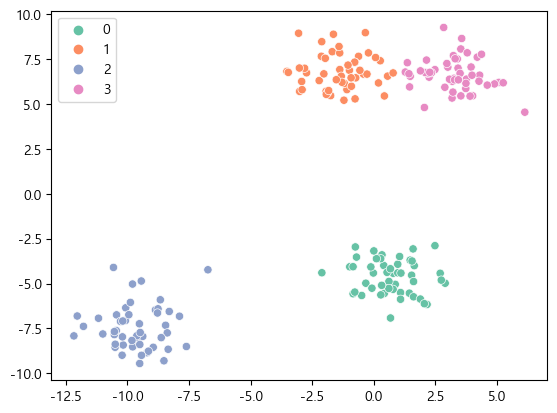

In [6]:
# 시각화
sns.scatterplot(x=df[0][:, 0], y=df[0][:, 1], hue=df[1], palette='Set2')

In [7]:
from sklearn.cluster import KMeans

# 객체 생성
model = KMeans(n_clusters=4)

# 모델 적합
model.fit(df[0])

KMeans(n_clusters=4)

In [8]:
# 모델을 적합한 레이블 확인
model.labels_

array([2, 2, 2, 2, 0, 2, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       1, 3, 1, 1, 0, 2, 0, 1, 1, 3, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 3,
       1, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 3, 3, 3, 2, 1, 3, 2, 3,
       0, 2, 3, 2, 3, 0, 3, 2, 3, 2, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 0, 1,
       0, 1, 3, 2, 0, 1, 2, 2, 1, 3, 0, 2, 3, 0, 1, 3, 0, 0, 1, 1, 3, 0,
       0, 1, 3, 0, 3, 1, 0, 3, 2, 2, 2, 3, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1,
       1, 3, 1, 2, 0, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 0, 3, 0, 3, 2, 1, 2,
       2, 1, 0, 0, 3, 0, 3, 3, 3, 0, 2, 3, 2, 1, 1, 0, 3, 0, 3, 0, 1, 0,
       0, 3, 2, 2, 3, 3, 0, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 0, 0, 2,
       3, 1])

In [9]:
# 이미 가지고 있는 cluster 확인
# 어떻게 나뉘었는지가 중요하지 숫자 자체가 중요하지는 않음
df[1]

array([2, 2, 2, 2, 1, 2, 3, 3, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 3, 0, 0, 1, 2, 1, 0, 0, 3, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 3, 3, 3, 2, 0, 3, 2, 3,
       1, 2, 3, 2, 3, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 2, 2, 0, 3, 1, 0,
       1, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 2, 3, 1, 0, 3, 1, 1, 0, 0, 3, 1,
       1, 0, 3, 1, 3, 0, 1, 3, 2, 2, 2, 3, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0,
       0, 3, 0, 2, 1, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 0, 2,
       2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 3, 3, 1, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1, 1, 2,
       3, 0])

<Axes: >

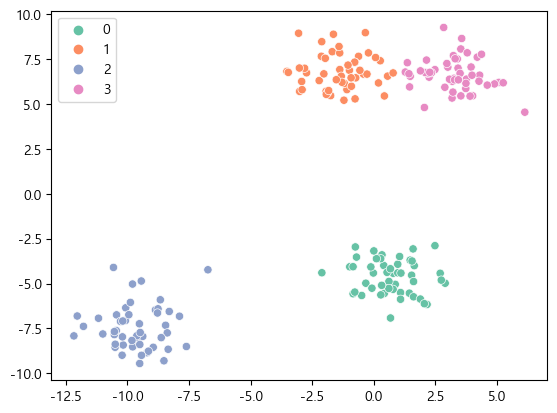

In [10]:
# 답안지
sns.scatterplot(x=df[0][:, 0], y=df[0][:, 1], hue=df[1], palette='Set2')

<Axes: >

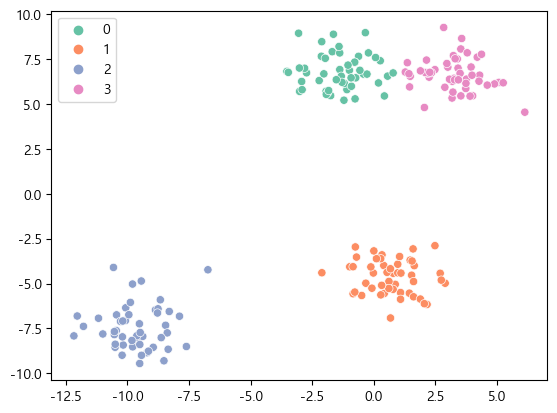

In [11]:
# 예측한 결과
sns.scatterplot(x=df[0][:, 0], y=df[0][:, 1], hue=model.labels_, palette='Set2')

<Axes: >

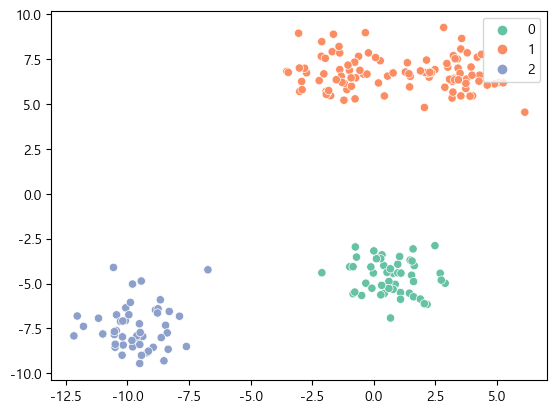

In [12]:
# 3개의 cluster 시각화
model = KMeans(n_clusters=3)
model.fit(df[0])
sns.scatterplot(x=df[0][:, 0], y=df[0][:, 1], hue=model.labels_, palette='Set2')

# 최적의 k값 찾기 - Elbow Method

<Axes: >

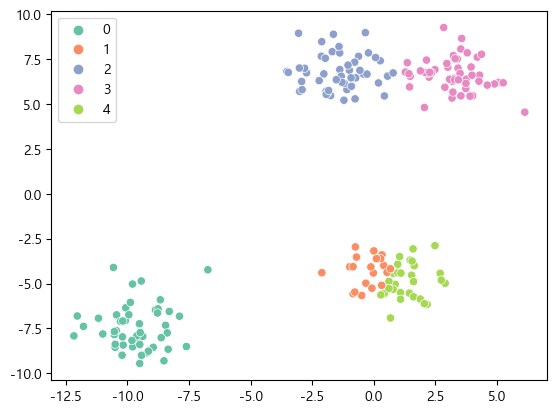

In [13]:
# 5개의 cluster 시각화
model = KMeans(n_clusters=5)
model.fit(df[0])
sns.scatterplot(x=df[0][:, 0], y=df[0][:, 1], hue=model.labels_, palette='Set2')

In [14]:
# 5개 cluter의 센터값
model.cluster_centers_

array([[-9.64972986, -7.46180493],
       [-0.26400761, -4.2966124 ],
       [-1.3849113 ,  6.78514243],
       [ 3.25526355,  6.63529725],
       [ 1.37964561, -4.87627522]])

In [15]:
# 각 클러스터의 중심(centroid)과 클러스터 내의 데이터 포인트들 간의 거리 제곱합을 나타내는 값
# 값이 낮을수록 각 클러스터의 데이터 포인트들이 중심 주변에 모여 있음을 나타내며, 클러스터링의 품질이 높음
# 더 많은 cluster를 만들수록 inertia는 자연스럽게 낮아짐 → 더 많은 센터들이 존재하고 그 센터들이 포함할 수 있는 클러스터 숫자 자체가 줄어들기 때문에 
model.inertia_

392.23975584514176

In [16]:
# cluster별 inertia 확인
distance = []

for i in range(2, 11) :
    model = KMeans(n_clusters=i)
    model.fit(df[0])
    distance.append(model.inertia_)

distance

[3855.3908583820516,
 967.5329197924485,
 428.6910143243809,
 377.22345810776244,
 343.6752396508763,
 330.66328282848906,
 311.0060350631028,
 237.2388376177128,
 233.09957020397684]

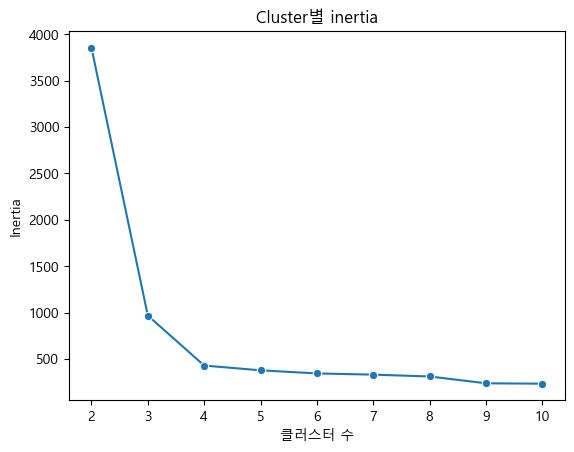

In [17]:
# 시각화
# 4보다 큰 cluster는 사실상 큰 효율을 보여주지 못함
# Emblow Method에서는 꺾이는 숫자가 최적의 숫자라고 판단
sns.lineplot(x=list(range(2, 11)), y=distance, marker='o')

plt.title('Cluster별 inertia')
plt.xlabel('클러스터 수')
plt.ylabel('Inertia')
plt.show()